In [507]:
import pandas as pd
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import scipy.stats as stats
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp as mt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import scikit_posthocs as sp
from Bio.SeqUtils import GC
import numpy as np
from collections import Counter, OrderedDict
from os import listdir

In [508]:
lsize=14
titlesize=16
axesthickness = 1.5
flierprops = dict(marker='o',markersize=1.5)
boxplot_kwargs = {'widths':0.65, 'vert':True, 'patch_artist':True, 'boxprops':dict(facecolor='#FEFBF3'), 'whis':[5, 95]}
bar_kwargs = {'color':'#C5DEFF', 'edgecolor':'#000000', 'capsize':4, 'linewidth':1.5}
plt.rcParams['axes.linewidth'] = axesthickness
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

### Import list of all experiments

In [509]:
path='./AnalysisFiles/'
def list_files1(directory):
    return [f for f in listdir(directory) if 'LS' in f]

sampledf = pd.DataFrame(columns=['filename','Cell_line','Editor','Replicate'])
filelist = list_files1(path)
sampledf['filename'] = filelist
sampledf['Library'] = 'Nme-Lib'
sampledf['Editor'] = sampledf['filename'].apply(lambda x: x.split('-')[1])
sampledf['Day'] = sampledf['filename'].apply(lambda x: x.split('-')[2][1:])
sampledf['Editor_Day'] = sampledf.apply(lambda x: x.Editor+'_'+x.Day ,axis=1)
sampledf['Replicate'] = sampledf['filename'].apply(lambda x: x.split('-')[3][1:])
sampledf['Control'] = sampledf['filename'].apply(lambda x: True if 'ctrl' in x else False)
sampledf['repname'] = sampledf.apply(lambda x: x.Editor+"_"+x.Day+"_"+x.Replicate,axis=1)
#sampledf['Cell_line_Editor'] = sampledf.apply(lambda x: x.Cell_line+"_"+x.Editor,axis=1)
#sampledf['repname'] = sampledf.apply(lambda x: x.Cell_line+"_"+x.Editor+"_"+x.Replicate,axis=1)

In [510]:
#templatedf = pd.read_csv('C:\\Users\\nicol\\switchdrive\\Institution\\PhD\\01_Experiments\\06_Various\\04_Lukas_Schmidheini\\Revisions\\Nuclease\\20230314_Nme2Cas9_Library_Members.csv')
templatedf = pd.read_csv('20230314_Nme2Cas9_Library_Members.csv')

In [511]:
sampledf

,filename,Cell_line,Editor,Replicate,Library,Day,Editor_Day,Control,repname
0,20230319_LS-p624-D3-R1-all.csv,NaN,p624,1,Nme-Lib,3,p624_3,False,p624_3_1
1,20230319_LS-p624-D3-R2-all.csv,NaN,p624,2,Nme-Lib,3,p624_3,False,p624_3_2
2,20230319_LS-p624-D3-R3-all.csv,NaN,p624,3,Nme-Lib,3,p624_3,False,p624_3_3
3,20230319_LS-p624-D5-R1-all.csv,NaN,p624,1,Nme-Lib,5,p624_5,False,p624_5_1
4,20230319_LS-p624-D5-R2-all.csv,NaN,p624,2,Nme-Lib,5,p624_5,False,p624_5_2
5,20230319_LS-p624-D5-R3-all.csv,NaN,p624,3,Nme-Lib,5,p624_5,False,p624_5_3
6,20230319_LS-p624-D7-R1-all.csv,NaN,p624,1,Nme-Lib,7,p624_7,False,p624_7_1
7,20230319_LS-p624-D7-R2-all.csv,NaN,p624,2,Nme-Lib,7,p624_7,False,p624_7_2
8,20230319_LS-p624-D7-R3-all.csv,NaN,p624,3,Nme-Lib,7,p624_7,False,p624_7_3
9,20230319_LS-p625-D10-R1-all.csv,NaN,p625,1,Nme-Lib,10,p625_10,False,p625_10_1


### Calculate control characteristics for each experimental setup

In [512]:
ctrllist = sampledf[sampledf['Editor'] == 'ctrl']
ctrldf = templatedf.copy()
for index, row in ctrllist.iterrows():
    controlrepdf = pd.read_csv(path+row.filename)
    ctrldf[row.repname+'_totalreads'] = controlrepdf['totalreads']
    controlrepdf['percentageindel'] = controlrepdf.apply(lambda x: (x.indelcount/x.totalreads)*100 ,axis=1)
    controlrepdf['percentageunedited'] = controlrepdf.apply(lambda x: (x.uneditedcount/x.totalreads)*100 ,axis=1)
    ctrldf[row.repname+'_percentageunedited'] = controlrepdf['percentageunedited']
    ctrldf[row.repname+'_percentageindel'] = controlrepdf['percentageindel']
    ctrldf[row.repname+'_uneditedcount'] = controlrepdf['uneditedcount']
    ctrldf[row.repname+'_indelcount'] = controlrepdf['indelcount']

for index, row in ctrllist.iterrows():    
    ctrldf = ctrldf[ctrldf[row.repname+'_totalreads'] > 100]
    ctrldf = ctrldf[ctrldf[row.repname+'_percentageindel'] < 30]

In [513]:
editordaylist = sampledf['Editor_Day'].unique()
editordaylist = [x for x in editordaylist if not 'ctrl' in x]
experimentdict = {}
for editor_day in editordaylist:
    experimentdf = templatedf.copy()
    for index, row in sampledf[sampledf['Editor_Day'] == editor_day].iterrows():
        dataframe = pd.read_csv(path+row.filename)
        dataframename = row.Editor+"_"+row.Day+"_"+row.Replicate
        day = row.Day
        experimentdf[dataframename+'_totalreads'] = dataframe['totalreads']
        dataframe['percentageindel'] = dataframe.apply(lambda x: (x.indelcount/x.totalreads)*100 ,axis=1)
        dataframe['percentageunedited'] = dataframe.apply(lambda x: (x.uneditedcount/x.totalreads)*100 ,axis=1)
        experimentdf[dataframename+'_percentageunedited'] = dataframe['percentageunedited']
        experimentdf[dataframename+'_percentageindel'] = dataframe['percentageindel']
        experimentdf[dataframename+'_uneditedcount'] = dataframe['uneditedcount']
        experimentdf[dataframename+'_indelcount'] = dataframe['indelcount']
        
    replicates = list(sampledf[sampledf['Editor_Day'] == editor_day].repname)
    controldf = sampledf[(sampledf['Editor'] == 'ctrl') & (sampledf['Day'] == day)]    
    #controlname = controldf['Cell_line_Editor'] + '_' + controldf['Replicate']
    
    ctrluneditedlist = []
    ctrlindellist = []
    lib = "Nme"
    for index, row in controldf.iterrows():
        ctrluneditedlist.append(row.repname+'_percentageunedited')
        ctrlindellist.append(row.repname+'_percentageindel')
        
    experimentdf['ctr'+'_'+day+'_percentageunedited'] = ctrldf[ctrluneditedlist].mean(axis=1)
    experimentdf['ctr'+'_'+day+'_percentageindel'] = ctrldf[ctrlindellist].mean(axis=1)

    cutoff = 100
    initialtemplen = len(experimentdf)

    for replicate in replicates:
        experimentdf = experimentdf[experimentdf[replicate+'_totalreads']>cutoff]
    print(editor_day)
    print(len(experimentdf))
    print()
    experimentdict[editor_day] = experimentdf

p624_3
86

p624_5
91

p624_7
93

p625_10
92

p624_10
94

p625_3
86

p625_5
88

p625_7
92



### Calculate editing characteristics for all experimental setups
Also clip editing levels to be between 0-100.

In [514]:
sampledf_woctr = sampledf[sampledf['Editor'] != 'ctrl']

In [515]:
editordaydf = sampledf_woctr.copy()
editordaydf = editordaydf[editordaydf['Replicate'] == "1"]
editordaydf = editordaydf.set_index('Editor_Day')

cols = ['Editor', 'Library', 'Day']
editordaydf = editordaydf[cols]
editordaydf

,Editor,Library,Day
Editor_Day,,,
p624_3,p624,Nme-Lib,3
p624_5,p624,Nme-Lib,5
p624_7,p624,Nme-Lib,7
p625_10,p625,Nme-Lib,10
p624_10,p624,Nme-Lib,10
p625_5,p625,Nme-Lib,5
p625_7,p625,Nme-Lib,7
p625_3,p625,Nme-Lib,3


In [516]:
for editor_day in experimentdict:
    print(editor_day)
    replicatelist = list(sampledf_woctr[sampledf_woctr['Editor_Day'] == editor_day]['repname'])
    day = editor_day.split('_')[1]
    ctrname = 'ctr'+'_'+day
    
    for replicate in replicatelist:
        print(replicate)
        repnr = replicate.split('_')[-1]
        experimentdict[editor_day][replicate+'_percentageindel_corrected_individual'] = experimentdict[editor_day].apply(lambda x: ((x[replicate+'_percentageindel']-x[ctrname+'_percentageindel'])/((100-x[ctrname+'_percentageindel'])/100)),axis=1)
        editordaydf.at[editor_day,repnr +'_meanindel'] = None
        editordaydf.at[editor_day,repnr +'_meanindel'] = experimentdict[editor_day][[replicate +'_percentageindel_corrected_individual']].mean()
        
    allreps = []
    for index,row in sampledf_woctr[sampledf_woctr['Editor_Day'] == editor_day].iterrows():
        rep = row.Editor_Day+'_'+row.Replicate
        allreps.append(rep)
        
    print(allreps)    
    experimentdict[editor_day][editor_day+'_averageindel'] = experimentdict[editor_day][[x +'_percentageindel_corrected_individual' for x in allreps]].mean(axis=1)
    
       
    # Clip editing rates to be between 0 and 100
    experimentdict[editor_day][editor_day+'_averageindel'] = experimentdict[editor_day][editor_day+'_averageindel'].clip(0,100)
    
    experimentdict[editor_day] = experimentdict[editor_day].dropna(subset=[editor_day+'_averageindel'])
    
    replist = ['1_meanindel','2_meanindel','3_meanindel']
    
    
    
    
    editordaydf.at[editor_day,'numberofvariants'] = len(experimentdict[editor_day])
    editordaydf.at[editor_day,'meanindel'] = experimentdict[editor_day][editor_day+'_averageindel'].mean()
    editordaydf.at[editor_day,'standarddeviation'] = experimentdict[editor_day][editor_day+'_averageindel'].std()
    # experimentdict[editor_day].to_csv('./AnalysisFiles/summary/20230319_'+editor_day+'_analysis_dataframe.csv')
    experimentdict[editor_day].to_csv('./AnalysisFiles/summary/20230319_'+editor_day+'_analysis_dataframe.csv')

p624_3
p624_3_1
p624_3_2
p624_3_3
['p624_3_1', 'p624_3_2', 'p624_3_3']
p624_5
p624_5_1
p624_5_2
p624_5_3
['p624_5_1', 'p624_5_2', 'p624_5_3']
p624_7
p624_7_1
p624_7_2
p624_7_3
['p624_7_1', 'p624_7_2', 'p624_7_3']
p625_10
p625_10_1
p625_10_2
p625_10_3
['p625_10_1', 'p625_10_2', 'p625_10_3']
p624_10
p624_10_1
p624_10_2
['p624_10_1', 'p624_10_2']
p625_3
p625_3_2
p625_3_3
p625_3_1
['p625_3_2', 'p625_3_3', 'p625_3_1']
p625_5
p625_5_1
p625_5_2
p625_5_3
['p625_5_1', 'p625_5_2', 'p625_5_3']
p625_7
p625_7_1
p625_7_2
p625_7_3
['p625_7_1', 'p625_7_2', 'p625_7_3']


In [517]:
for index, row in editordaydf.iterrows():
    editordaydf.at[index,'replicate_meanindel'] = (row['1_meanindel'] + row['2_meanindel'] + row['3_meanindel']) / 3
    editordaydf.at[index,'replicate_std'] = np.std([row['1_meanindel'],row['2_meanindel'],row['3_meanindel']])


In [518]:
### Only 2 replicates for p624 d10 since gDNA extraction of 3rd replicate failed

editordaydf.at['p624_10','replicate_meanindel'] = (row['1_meanindel'] + row['2_meanindel']) / 2
editordaydf.at['p624_10','replicate_std'] = np.std([row['1_meanindel'],row['2_meanindel']])

In [519]:
editordaydf['Day'] = editordaydf['Day'].apply(lambda x: int(x))
editordaydf = editordaydf.sort_values('Day')
editordaydf = editordaydf.sort_values('Editor')
editordaydf['filename'] = editordaydf.apply(lambda x: '20230319_'+x.Editor+'_'+str(x.Day)+'_analysis_dataframe.csv',axis=1)
editordaydf.to_csv('./AnalysisFiles/summary/20230319_Nme_summary_mean_std.csv')
editordaydf

,Editor,Library,Day,1_meanindel,2_meanindel,3_meanindel,numberofvariants,meanindel,standarddeviation,replicate_meanindel,replicate_std,filename
Editor_Day,,,,,,,,,,,,
p624_3,p624,Nme-Lib,3,2.959890,0.868013,0.694579,82.0,1.683730,2.009850,1.507494,1.029437,20230319_p624_3_analysis_dataframe.csv
p624_5,p624,Nme-Lib,5,9.065752,1.639692,6.079434,82.0,5.633106,6.005836,5.594960,3.050970,20230319_p624_5_analysis_dataframe.csv
p624_7,p624,Nme-Lib,7,14.628223,2.399955,9.521410,82.0,8.937297,8.771671,8.849863,5.014703,20230319_p624_7_analysis_dataframe.csv
p624_10,p624,Nme-Lib,10,23.213612,9.272535,NaN,82.0,16.337299,16.430702,1.171369,0.818643,20230319_p624_10_analysis_dataframe.csv
p625_3,p625,Nme-Lib,3,1.990013,0.352726,0.645900,82.0,1.303122,2.529066,0.996213,0.712842,20230319_p625_3_analysis_dataframe.csv
p625_5,p625,Nme-Lib,5,6.483692,1.021911,3.587557,82.0,3.878708,5.915519,3.697720,2.231123,20230319_p625_5_analysis_dataframe.csv
p625_7,p625,Nme-Lib,7,11.761472,1.351390,7.711533,82.0,7.173897,10.147254,6.941465,4.284640,20230319_p625_7_analysis_dataframe.csv
p625_10,p625,Nme-Lib,10,18.308607,7.864572,17.631898,82.0,14.830514,19.832327,14.601692,4.771867,20230319_p625_10_analysis_dataframe.csv


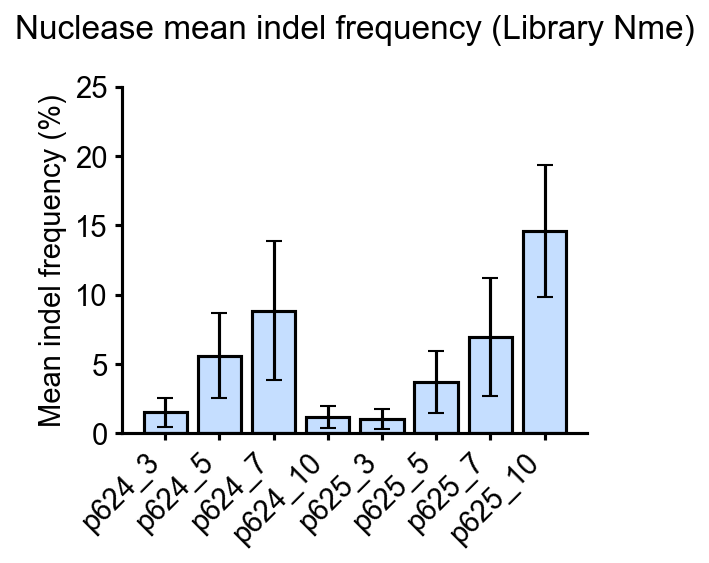

In [520]:
conditionlist = list(editordaydf.index)
meanlist = list(editordaydf.replicate_meanindel)
stdlist = list(editordaydf.replicate_std)

fig1, ax1 = plt.subplots(figsize = (4,3),dpi=150,sharex=True)
ax1.set_title('Nuclease mean indel frequency (Library Nme)\n', fontsize=titlesize)
ax1.bar(conditionlist,meanlist,yerr=stdlist, **bar_kwargs)
ax1.set_xticks(range(len(conditionlist)))
ax1.set_xticklabels(conditionlist, ha="right")
#ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel('Mean indel frequency (%)', fontsize=lsize)
ax1.tick_params(axis='x', labelsize= lsize, width=1.5, rotation=45)
ax1.tick_params(axis='y', labelsize= lsize, width=1.5)
ax1.set_ylim(0,25)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#figurepath = 'C:\\Users\\nicol\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\'
#plt.savefig(figurepath+'Nuclease_1421_meanefficiency.pdf', format='pdf',
#        transparent=True,bbox_inches='tight')

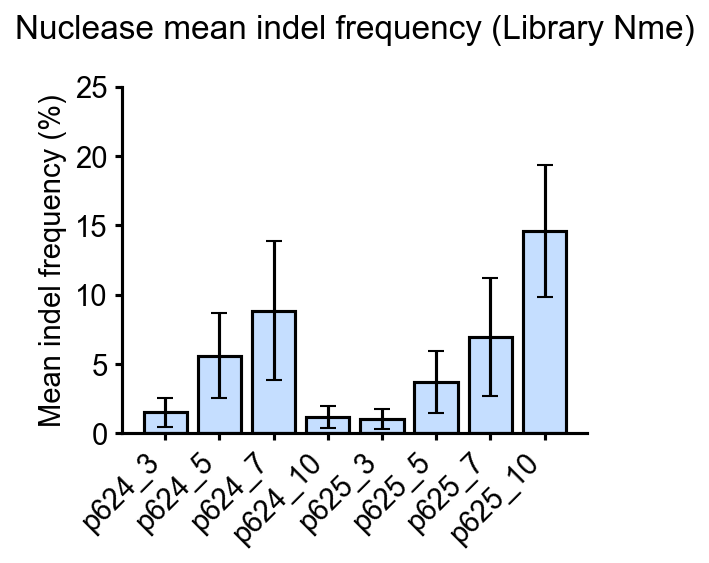

In [521]:
conditionlist = list(editordaydf.index)
meanlist = list(editordaydf.replicate_meanindel)
stdlist = list(editordaydf.replicate_std)

fig1, ax1 = plt.subplots(figsize = (4,3),dpi=150,sharex=True)
ax1.set_title('Nuclease mean indel frequency (Library Nme)\n', fontsize=titlesize)
ax1.bar(conditionlist,meanlist,yerr=stdlist, **bar_kwargs)
ax1.set_xticks(range(len(conditionlist)))
ax1.set_xticklabels(conditionlist, ha="right")
#ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel('Mean indel frequency (%)', fontsize=lsize)
ax1.tick_params(axis='x', labelsize= lsize, width=1.5, rotation=45)
ax1.tick_params(axis='y', labelsize= lsize, width=1.5)
ax1.set_ylim(0,25)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#figurepath = 'C:\\Users\\nicol\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\'
#plt.savefig(figurepath+'Nuclease_1421_meanefficiency.pdf', format='pdf',
#        transparent=True,bbox_inches='tight')

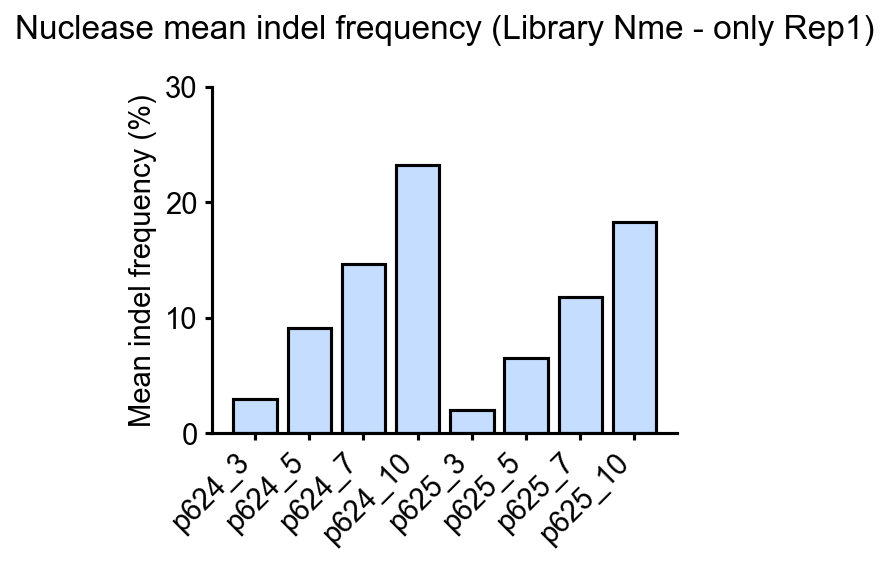

In [522]:
conditionlist = list(editordaydf.index)
meanlist = list(editordaydf['1_meanindel'])
stdlist = list(editordaydf.replicate_std)

fig1, ax1 = plt.subplots(figsize = (4,3),dpi=150,sharex=True)
ax1.set_title('Nuclease mean indel frequency (Library Nme - only Rep1)\n', fontsize=titlesize)
ax1.bar(conditionlist,meanlist, **bar_kwargs)
ax1.set_xticks(range(len(conditionlist)))
ax1.set_xticklabels(conditionlist, ha="right")
#ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel('Mean indel frequency (%)', fontsize=lsize)
ax1.tick_params(axis='x', labelsize= lsize, width=1.5, rotation=45)
ax1.tick_params(axis='y', labelsize= lsize, width=1.5)
ax1.set_ylim(0,30)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
figurepath = 'C:\\Users\\nicol\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\'
#plt.savefig(figurepath+'Nuclease_1421_meanefficiency.pdf', format='pdf',
#        transparent=True,bbox_inches='tight')

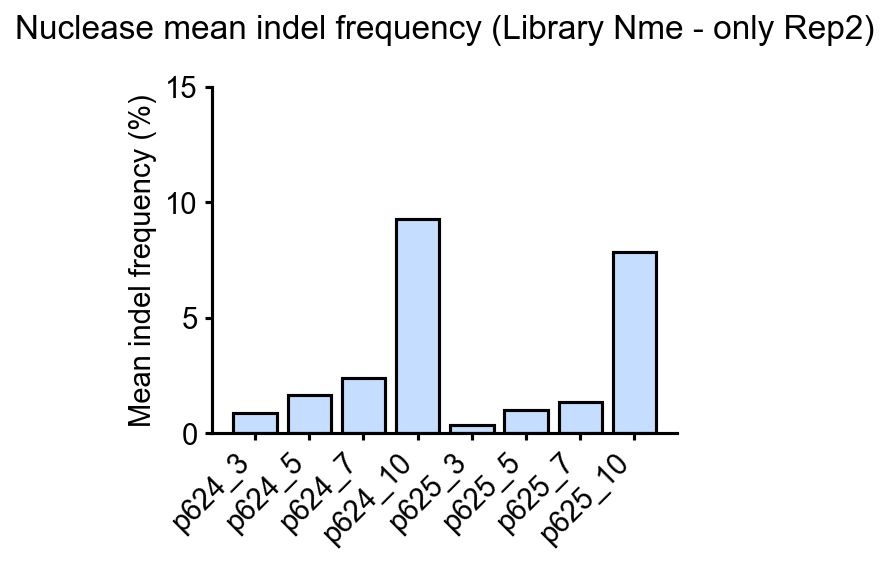

In [523]:
conditionlist = list(editordaydf.index)
meanlist = list(editordaydf['2_meanindel'])
stdlist = list(editordaydf.replicate_std)

fig1, ax1 = plt.subplots(figsize = (4,3),dpi=150,sharex=True)
ax1.set_title('Nuclease mean indel frequency (Library Nme - only Rep2)\n', fontsize=titlesize)
ax1.bar(conditionlist,meanlist, **bar_kwargs)
ax1.set_xticks(range(len(conditionlist)))
ax1.set_xticklabels(conditionlist, ha="right")
#ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel('Mean indel frequency (%)', fontsize=lsize)
ax1.tick_params(axis='x', labelsize= lsize, width=1.5, rotation=45)
ax1.tick_params(axis='y', labelsize= lsize, width=1.5)
ax1.set_ylim(0,15)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
figurepath = 'C:\\Users\\nicol\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\'
#plt.savefig(figurepath+'Nuclease_1421_meanefficiency.pdf', format='pdf',
#        transparent=True,bbox_inches='tight')

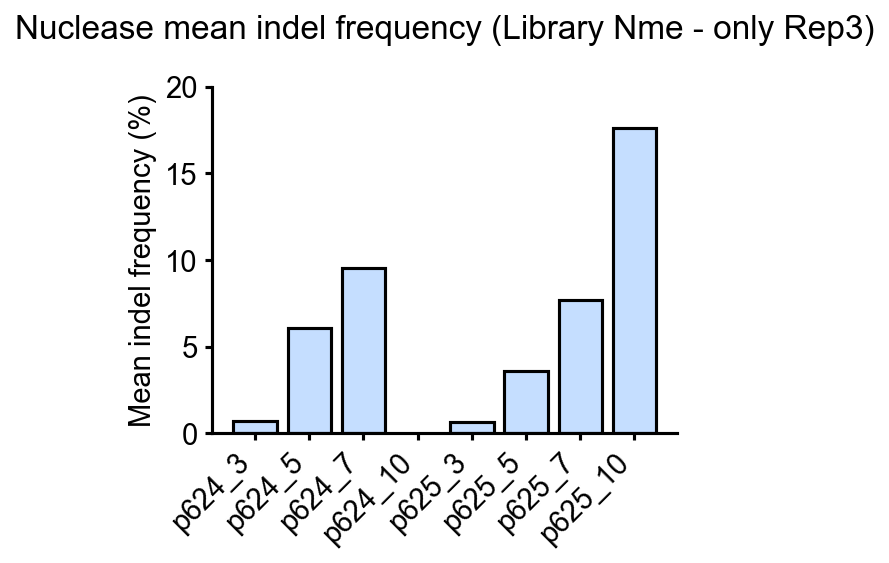

In [524]:
conditionlist = list(editordaydf.index)
meanlist = list(editordaydf['3_meanindel'])
stdlist = list(editordaydf.replicate_std)

fig1, ax1 = plt.subplots(figsize = (4,3),dpi=150,sharex=True)
ax1.set_title('Nuclease mean indel frequency (Library Nme - only Rep3)\n', fontsize=titlesize)
ax1.bar(conditionlist,meanlist, **bar_kwargs)
ax1.set_xticks(range(len(conditionlist)))
ax1.set_xticklabels(conditionlist, ha="right")
#ax1.set_yticks(np.linspace(0,1,11))
ax1.set_ylabel('Mean indel frequency (%)', fontsize=lsize)
ax1.tick_params(axis='x', labelsize= lsize, width=1.5, rotation=45)
ax1.tick_params(axis='y', labelsize= lsize, width=1.5)
ax1.set_ylim(0,20)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
figurepath = 'C:\\Users\\nicol\\switchdrive\\Institution\\PhD\\01_Experiments\\05_Various\\04_Lukas_Schmidheini\\Nuclease\\'
#plt.savefig(figurepath+'Nuclease_1421_meanefficiency.pdf', format='pdf',
#        transparent=True,bbox_inches='tight')

### Filter libraries 1421, 1422 and 1423 and Nme, TnpB and CasMini Library to contain only spacers which occur in all three libraries for all editors

In [525]:
editordaydf1421 = pd.read_csv('./AnalysisFiles/summary/20220912_1421_summary_mean_std.csv')
editordaydf1422 = pd.read_csv('./AnalysisFiles/summary/20220912_1422_summary_mean_std.csv')
editordaydf1423 = pd.read_csv('./AnalysisFiles/summary/20220912_1423_summary_mean_std.csv')
editordaydfNme = pd.read_csv('./AnalysisFiles/summary/20230319_Nme_summary_mean_std.csv')

path='../../NGS/20230420_TnpB_CasMini_CjPAM_Libraries/CasMini/Output/Analysis/summary/'
editordaydfCasMini = pd.read_csv(path+'20230420_CasMini_LS_summary_mean_std.csv')

path='../../NGS/20230420_TnpB_CasMini_CjPAM_Libraries/TnpB/Output/Analysis/summary/'
editordaydfTnpB = pd.read_csv(path+'20230420_TnpB_LS_summary_mean_std.csv')

In [526]:
editordaydf_all = editordaydf1421.append(editordaydf1422).append(editordaydf1423).append(editordaydfNme).append(editordaydfCasMini).append(editordaydfTnpB)

/tmp/ipykernel_91590/2702163550.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  editordaydf_all = editordaydf1421.append(editordaydf1422).append(editordaydf1423).append(editordaydfNme).append(editordaydfCasMini).append(editordaydfTnpB)
/tmp/ipykernel_91590/2702163550.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  editordaydf_all = editordaydf1421.append(editordaydf1422).append(editordaydf1423).append(editordaydfNme).append(editordaydfCasMini).append(editordaydfTnpB)
/tmp/ipykernel_91590/2702163550.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  editordaydf_all = editordaydf1421.append(editordaydf1422).append(editordaydf1423).append(editordaydfNme).append(editordaydfCasMini).append(editordaydfTnpB)
/tmp/ipykerne

In [527]:
editordaydf_all = editordaydf_all.reset_index()

cols = ['Editor', 'Library', 'Day', '1_meanindel', '2_meanindel', '3_meanindel',
       'numberofvariants', 'meanindel', 'standarddeviation',
       'replicate_meanindel', 'replicate_std']

filtereditordaydf = pd.DataFrame(columns=cols)

for day in [3,5,7,10]:
    numberlist_temp = []
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        tempdf = pd.read_csv('./AnalysisFiles/summary/'+row.filename)
        numberlist_temp.append(list(tempdf['Number']))

    numberlist_unique = set.intersection(*map(set,numberlist_temp))
    
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        tempdf = pd.read_csv('./AnalysisFiles/summary/'+row.filename)
        tempdf = tempdf[tempdf['Number'].isin(numberlist_unique)]
        tempdf.to_csv('./AnalysisFiles/summary/20230420_'+row.Editor+'_'+str(row.Day)+'_filtered_analysis_dataframe.csv')
        filtereditordaydf.at[index, 'Editor'] = row.Editor
        filtereditordaydf.at[index, 'Library'] = row.Library
        filtereditordaydf.at[index, 'Day'] = row.Day
        filtereditordaydf.at[index, '1_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_1_percentageindel_corrected_individual'].mean()
        try:
            filtereditordaydf.at[index, '2_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'].mean()
        except KeyError:
            filtereditordaydf.at[index, '2_meanindel'] = np.nan
        try:
            filtereditordaydf.at[index, '3_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'].mean()
        except KeyError:
            filtereditordaydf.at[index, '3_meanindel'] = np.nan
        filtereditordaydf.at[index,'numberofvariants'] = len(tempdf)
        filtereditordaydf.at[index,'meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].mean()
        filtereditordaydf.at[index,'standarddeviation'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].std()
        filtereditordaydf.at[index,'replicate_meanindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].mean()
        filtereditordaydf.at[index,'replicate_std'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].std()
        
for index, row in filtereditordaydf.iterrows():        
    filtereditordaydf.at[index,'replicate_meanindel'] = (row['1_meanindel'] + row['2_meanindel'] + row['3_meanindel']) / 3
    filtereditordaydf.at[index,'replicate_std'] = np.std([row['1_meanindel'],row['2_meanindel'],row['3_meanindel']])
    
    
filtereditordaydf.to_csv('20230420_Nuclease_Summary_MeanAndMore.csv', index=False)

In [528]:
editordaydf_all

,index,Editor_Day,Editor,Library,Day,1_meanindel,2_meanindel,3_meanindel,numberofvariants,meanindel,standarddeviation,replicate_meanindel,replicate_std,filename,2_std
0,0,p551evo_3,p551evo,1421,3,29.612944,32.639459,29.568904,67.0,30.607102,14.036894,30.607102,1.437206,20220912_p551evo_3_analysis_dataframe.csv,NaN
1,1,p551evo_5,p551evo,1421,5,52.899245,54.534491,52.795041,71.0,53.409593,13.789561,53.409593,0.796560,20220912_p551evo_5_analysis_dataframe.csv,NaN
2,2,p551evo_7,p551evo,1421,7,63.770891,62.760601,64.606131,71.0,63.712541,10.956278,63.712541,0.754563,20220912_p551evo_7_analysis_dataframe.csv,NaN
3,3,p551evo_10,p551evo,1421,10,77.546140,79.614891,77.307387,69.0,78.156139,10.605724,78.156139,1.036088,20220912_p551evo_10_analysis_dataframe.csv,NaN
4,4,p551wt_3,p551wt,1421,3,1.939696,4.295350,2.510568,70.0,3.108530,4.308544,2.915205,1.003352,20220912_p551wt_3_analysis_dataframe.csv,NaN
5,5,p551wt_5,p551wt,1421,5,6.323777,7.687418,6.466345,70.0,6.843946,4.472074,6.825847,0.611997,20220912_p551wt_5_analysis_dataframe.csv,NaN
6,6,p551wt_7,p551wt,1421,7,7.708665,8.857881,6.479821,70.0,7.696623,4.313325,7.682122,0.971020,20220912_p551wt_7_analysis_dataframe.csv,NaN
7,7,p551wt_10,p551wt,1421,10,13.734190,20.537206,34.423467,67.0,22.898287,9.352082,22.898287,8.609784,20220912_p551wt_10_analysis_dataframe.csv,NaN
8,8,p613_3,p613,1421,3,39.081791,39.174448,39.644567,71.0,39.300269,18.000349,39.300269,0.246377,20220912_p613_3_analysis_dataframe.csv,NaN
9,9,p613_5,p613,1421,5,62.160346,60.972764,61.021005,67.0,61.384705,14.162911,61.384705,0.548814,20220912_p613_5_analysis_dataframe.csv,NaN


In [529]:
editordaydf_all = editordaydf_all.reset_index()

cols = ['Editor', 'Library', 'Day', '1_meanindel', '2_meanindel', '3_meanindel',
       'numberofvariants', 'meanindel', 'standarddeviation',
       'replicate_meanindel', 'replicate_std']

filtereditordaydf = pd.DataFrame(columns=cols)

editorlist = list(editordaydf_all[editordaydf_all['Day'] == 10].Editor)



for day in [3,5,7,10]:
    boxplot_averagedf = pd.DataFrame()
    boxplot_individualdf = pd.DataFrame()
    print()
    print(day)
    numberlist_temp = []
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        tempdf = pd.read_csv('./AnalysisFiles/summary/'+row.filename)
        if (row.Library != 'TnpB-Lib') and (row.Library != 'CasMini-Lib'):
            numberlist_temp.append(list(tempdf['Number']))
        
    numberlist_unique = set.intersection(*map(set,numberlist_temp))
    
    for index, row in editordaydf_all[editordaydf_all['Day'] == day].iterrows():
        print(row.filename)
        tempdf = pd.read_csv('./AnalysisFiles/summary/'+row.filename)
        tempdf = tempdf[tempdf['Number'].isin(numberlist_unique)]
        
        tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'] = tempdf[row.Editor+'_'+str(row.Day)+'_averageindel'].clip(0,100)
        tempdf[row.Editor+'_'+str(row.Day)+'_1_percentageindel_corrected_individual'] = tempdf[row.Editor+'_'+str(row.Day)+'_1_percentageindel_corrected_individual'].clip(0,100)
        try:
            tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'] = tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'].clip(0,100)
        except KeyError:
            tempdf[row.Editor+'_'+str(row.Day)+'_2_percentageindel_corrected_individual'] = np.nan
        try:
            tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'] = tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'].clip(0,100)
        except KeyError:
            tempdf[row.Editor+'_'+str(row.Day)+'_3_percentageindel_corrected_individual'] = np.nan
        for _, temp_row in tempdf.iterrows():
            number = temp_row['Number']
            boxplot_averagedf.at[number, row.Editor] = temp_row[row.Editor+'_'+str(row.Day)+'_averageindel']
            
            replicates = []
            replicates.append(temp_row[row.Editor + '_' + str(row.Day) + '_1_percentageindel_corrected_individual'])
            try:
                replicates.append(temp_row[row.Editor + '_' + str(row.Day) + '_2_percentageindel_corrected_individual'])
            except KeyError:
                pass
            try:
                replicates.append(temp_row[row.Editor + '_' + str(row.Day) + '_3_percentageindel_corrected_individual'])
            except KeyError:
                pass
            
            for idx, value in enumerate(replicates):
                boxplot_individualdf.at[str(number) + '_R' + str(idx + 1), row.Editor] = value



    boxplot_averagedf.to_csv('figures/20230420_Nuclease_Summary_Averageofreplicates_allgRNA_datapoints_day'+str(day)+'.csv')

    boxplot_individualdf.to_csv('figures/20230420_Nuclease_Summary_individualreplicates_allgRNA_datapoints_day'+str(day)+'.csv')


3
20220912_p551evo_3_analysis_dataframe.csv
20220912_p551wt_3_analysis_dataframe.csv
20220912_p613_3_analysis_dataframe.csv
20220912_p614_3_analysis_dataframe.csv
20220912_p615_3_analysis_dataframe.csv
20220912_p616_3_analysis_dataframe.csv
20220912_p619_3_analysis_dataframe.csv
20220912_p620_3_analysis_dataframe.csv
20220912_p621_3_analysis_dataframe.csv
20220912_p622_3_analysis_dataframe.csv
20230319_p624_3_analysis_dataframe.csv
20230319_p625_3_analysis_dataframe.csv
20230420_p633_3_analysis_dataframe.csv
20230319_p632_3_analysis_dataframe.csv

5
20220912_p551evo_5_analysis_dataframe.csv
20220912_p551wt_5_analysis_dataframe.csv
20220912_p613_5_analysis_dataframe.csv
20220912_p614_5_analysis_dataframe.csv
20220912_p615_5_analysis_dataframe.csv
20220912_p616_5_analysis_dataframe.csv
20220912_p619_5_analysis_dataframe.csv
20220912_p620_5_analysis_dataframe.csv
20220912_p621_5_analysis_dataframe.csv
20220912_p622_5_analysis_dataframe.csv
20230319_p624_5_analysis_dataframe.csv
20230319_

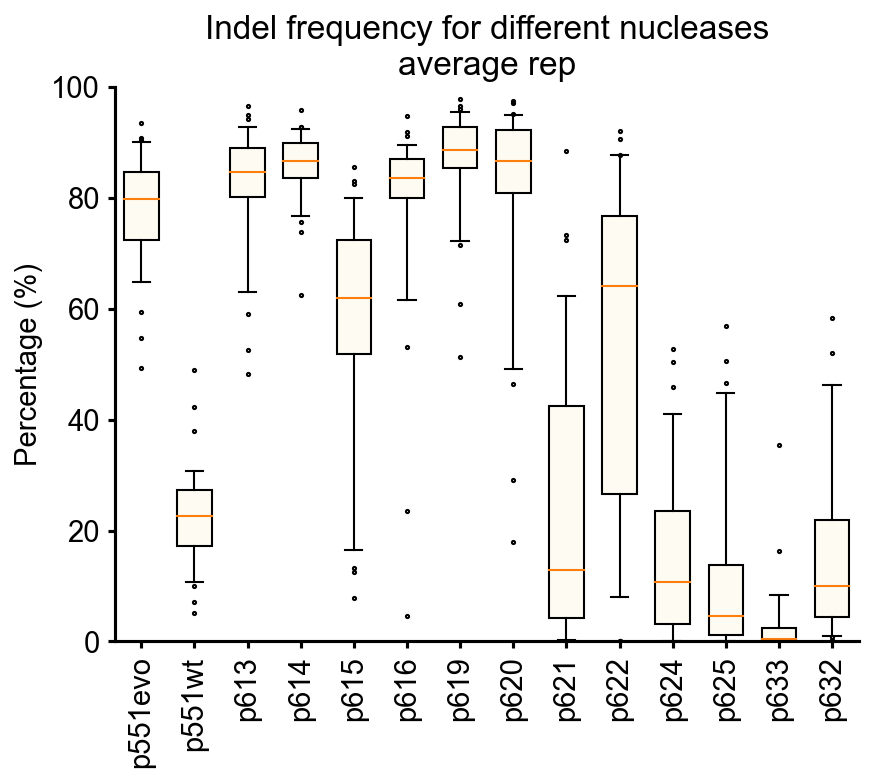

In [530]:
allnucleases = editorlist
editinglist = []
for motif in list(allnucleases):
    editinglist.append(boxplot_averagedf[motif].dropna())
fig11, ax11 = plt.subplots(dpi=150)
ax11.set_title('Indel frequency for different nucleases\naverage rep', fontsize=titlesize)
ax11.boxplot(editinglist,**boxplot_kwargs, flierprops = flierprops)
ax11.set_xticklabels(allnucleases)
ax11.set_ylabel('Percentage (%)', fontsize=lsize)
ax11.tick_params(axis='x', labelsize= lsize, width=1.5)
ax11.tick_params(axis='y', labelsize= lsize, width=1.5)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.tick_params(axis='x', labelrotation=90)
ax11.set_ylim(0,100)
figurepath = 'figures/'
plt.savefig(figurepath+'20230420_allnucleases_comparison_averagerep_boxplot.pdf', format='pdf',transparent=True,bbox_inches='tight')
plt.show()

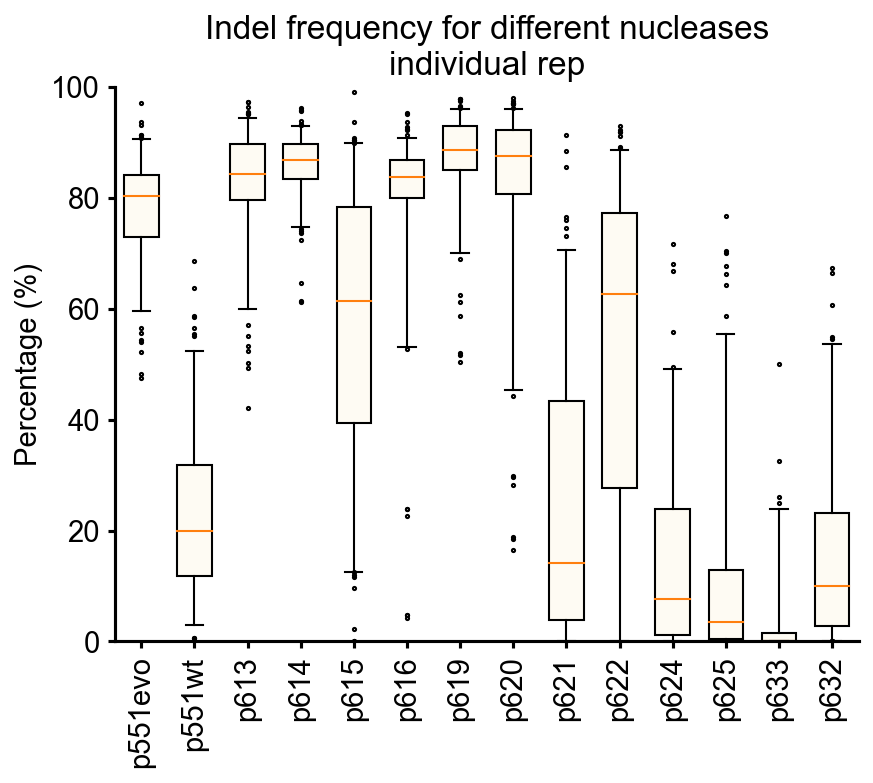

In [531]:
allnucleases = editorlist
editinglist = []
for motif in list(allnucleases):
    editinglist.append(boxplot_individualdf[motif].dropna())
fig11, ax11 = plt.subplots(dpi=150)
ax11.set_title('Indel frequency for different nucleases\nindividual rep', fontsize=titlesize)
ax11.boxplot(editinglist,**boxplot_kwargs, flierprops = flierprops)
ax11.set_xticklabels(allnucleases)
ax11.set_ylabel('Percentage (%)', fontsize=lsize)
ax11.tick_params(axis='x', labelsize= lsize, width=1.5)
ax11.tick_params(axis='y', labelsize= lsize, width=1.5)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.tick_params(axis='x', labelrotation=90)
ax11.set_ylim(0,100)
figurepath = 'figures/'
plt.savefig(figurepath+'20230420_allnucleases_comparison_individualrep_boxplot.pdf', format='pdf',transparent=True,bbox_inches='tight')
plt.show()

## Create supplementary file for nucleases

In [532]:
writer = pd.ExcelWriter('20230420_SupplementaryTable4_CjCas_Nuclease_Libraries.xlsx')

librarylist = ["1421","1422","1423","Nme","TnpB","CasMini"]
for lib in librarylist:
    nucleasepath = "AnalysisFiles/summary/"
    for day in ['3','5','7','10']:
        def nuc_files(directory):
            return [f for f in listdir(directory) if (day+'_analysis_dataframe.csv' in f)]
        nuclist = nuc_files(nucleasepath)
        for file in nuclist:
            editorname = file.split('_')[1]
            tempdf = pd.read_csv(nucleasepath+file)
            collist = list(tempdf.columns)
            unnamedcols = [x for x in collist if 'Unnamed' in x]
            tempdf = tempdf.drop(columns=unnamedcols)
            tempdf.to_excel(writer, sheet_name=editorname+'_'+day, index=False)
    
writer.save()

/tmp/ipykernel_91590/2741555524.py:18: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
